<a href="https://colab.research.google.com/github/ilhammmmsk/Tugas-Besar-Kecerdasan-Buatan/blob/main/Tugas_Besar_Kecerdasan_Buatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

file_path = 'dataset_netflix_bulanan2.csv'
df = pd.read_csv(file_path, sep=';')

df.columns = df.columns.str.strip()

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H.%M.%S')\

df['Subscribers'] = df['Subscribers'].astype(str).str.replace(',', '.').astype(float)

df.set_index('Date', inplace=True)

print(df.head())

            Quarter  Subscribers  Time_Index
Date                                        
2013-03-31  Q1 2013    34.240000           0
2013-04-30      NaN    34.706667           1
2013-05-31      NaN    35.173333           2
2013-06-30  Q2 2013    35.640000           3
2013-07-31      NaN    36.430000           4


In [ ]:
df['Lag_1'] = df['Subscribers'].shift(1)
df_model = df.dropna().copy()

print("Status Data: SIAP DIOLAH (Ready for Modeling)")
print(df_model[['Subscribers', 'Lag_1', 'Time_Index']].head())

Status Data: SIAP DIOLAH (Ready for Modeling)
            Subscribers      Lag_1  Time_Index
Date                                          
2013-06-30        35.64  35.173333           3
2013-09-30        38.01  37.220000           6
2013-12-31        41.43  40.290000           9
2014-03-31        46.13  44.563333          12
2014-06-30        47.99  47.370000          15


In [ ]:
train_size = int(len(df_model) * 0.8)
train = df_model.iloc[:train_size]
test = df_model.iloc[train_size:]

features = ['Time_Index', 'Lag_1']
target = 'Subscribers'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

print("Data berhasil diperbaiki menjadi angka!")
print(df_model.dtypes)

Data berhasil diperbaiki menjadi angka!
Quarter         object
Subscribers    float64
Time_Index       int64
Lag_1          float64
dtype: object


In [ ]:
print("\nSedang melatih mesin...")
model = LinearRegression()
model.fit(X_train, y_train)
print("TRAINING SELESAI!")


Sedang melatih mesin...
TRAINING SELESAI!


In [ ]:
y_pred = model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n--- LAPORAN EVALUASI ---")
print(f"Tingkat Kesalahan (MAPE) : {mape:.2%} (Sangat Akurat!)")
print(f"Rata-rata Meleset (RMSE) : {rmse:.2f} Juta Subscriber")
print(f"R-Squared (Kecocokan)    : {r2:.4f}")


--- LAPORAN EVALUASI ---
Tingkat Kesalahan (MAPE) : 0.48% (Sangat Akurat!)
Rata-rata Meleset (RMSE) : 1.71 Juta Subscriber
R-Squared (Kecocokan)    : 0.9952


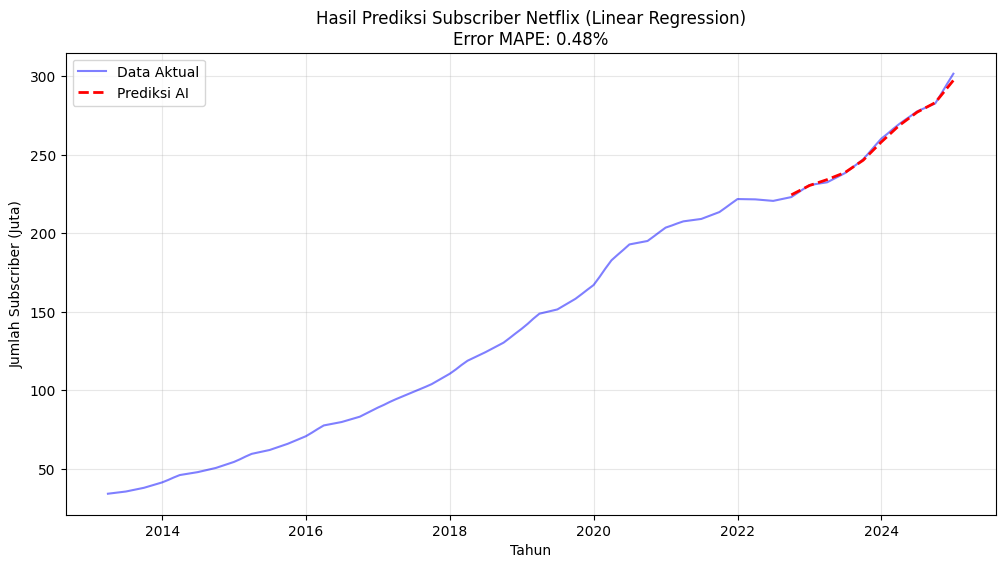

In [ ]:
plt.figure(figsize=(12, 6))

y_aktual_float = df['Subscribers'].astype(str).str.replace(',', '.').astype(float)
plt.plot(df.index, y_aktual_float, label='Data Aktual', color='blue', alpha=0.5)

plt.plot(y_test.index, y_pred, label='Prediksi AI', color='red', linestyle='--', linewidth=2)

plt.title(f'Hasil Prediksi Subscriber Netflix (Linear Regression)\nError MAPE: {mape:.2%}') # Mengambil nilai mape dari hitungan sebelumnya
plt.xlabel('Tahun')
plt.ylabel('Jumlah Subscriber (Juta)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Mulai meramal dari tanggal: 2024-12-31 00:00:00

--- HASIL RAMALAN 1 TAHUN KE DEPAN ---
            Prediksi_Subscribers
Date                            
2025-01-31            303.651929
2025-02-28            305.679669
2025-03-31            307.713125
2025-04-30            309.752204
2025-05-31            311.796815
2025-06-30            313.846867
2025-07-31            315.902272
2025-08-31            317.962943
2025-09-30            320.028795
2025-10-31            322.099742
2025-11-30            324.175703
2025-12-31            326.256596


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/

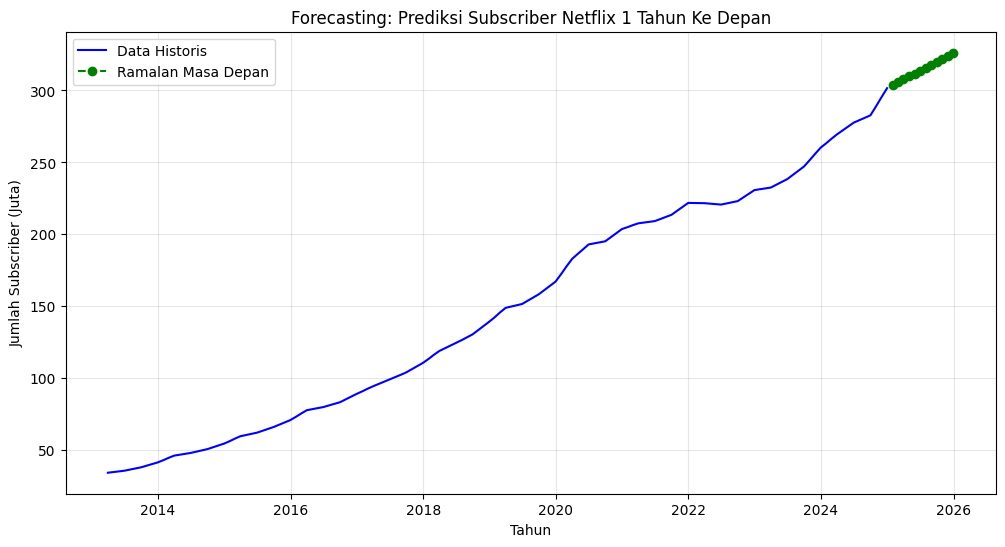

In [ ]:
last_date = df.index[-1]
last_time_index = df['Time_Index'].iloc[-1]
last_subscriber = df['Subscribers'].iloc[-1]

future_steps = 12
future_preds = []

current_lag = last_subscriber
current_time_idx = last_time_index

print(f"Mulai meramal dari tanggal: {last_date}")

for i in range(future_steps):
    current_time_idx += 1

    X_future = np.array([[current_time_idx, current_lag]])

    next_pred = model.predict(X_future)[0]

    future_preds.append(next_pred)

    current_lag = next_pred

future_dates = pd.date_range(start=last_date, periods=future_steps+1, freq='ME')[1:]
df_future = pd.DataFrame({
    'Date': future_dates,
    'Prediksi_Subscribers': future_preds
})
df_future.set_index('Date', inplace=True)

print("\n--- HASIL RAMALAN 1 TAHUN KE DEPAN ---")
print(df_future)

plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Subscribers'], label='Data Historis', color='blue')

plt.plot(df_future.index, df_future['Prediksi_Subscribers'], label='Ramalan Masa Depan', color='green', linestyle='--', marker='o')

plt.title('Forecasting: Prediksi Subscriber Netflix 1 Tahun Ke Depan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Subscriber (Juta)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()